In [25]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

#### Loading data

In [26]:
train_data = tf.keras.utils.image_dataset_from_directory('dog-cat/dataset/training_set',image_size=(128,128),label_mode='binary',shuffle=True)

Found 8000 files belonging to 2 classes.


In [27]:
val_data = tf.keras.utils.image_dataset_from_directory('dog-cat/dataset/test_set/',image_size=(128,128),label_mode='binary')

Found 2000 files belonging to 2 classes.


#### Rescaling images

In [28]:
train_data = train_data.map(lambda x,y:(x/255,y))
val_data = val_data.map(lambda x,y:(x/255,y))
# scaled_iterator = train_data.as_numpy_iterator()
# scaled_iterator.next()[0].max()

#### Image Augmentation

In [29]:
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    # layers.RandomZoom(0.2), -> prv
])
train_data = train_data.map(lambda x,y:(data_augmentation(x,training=True),y))

In [30]:
# train_data = train_data.shuffle(buffer_size=len(train_data))

In [31]:
train_data = train_data.prefetch(tf.data.AUTOTUNE)
val_data = val_data.prefetch(tf.data.AUTOTUNE)

#### CNN structure

In [32]:
model = tf.keras.Sequential([
    layers.Conv2D(32,3,activation='relu',padding='same',input_shape=[128,128,3]),
    layers.MaxPooling2D(pool_size=2,strides=2),
    layers.Conv2D(64,3,activation='relu',padding='same'),
    layers.MaxPooling2D(pool_size=2,strides=2),
    layers.Conv2D(64,3,activation='relu',padding='same'), # -> prv
    layers.MaxPooling2D(pool_size=2,strides=2), # -> prv
    layers.Conv2D(64,3,activation='relu',padding='same'),
    layers.MaxPooling2D(pool_size=2,strides=2),
    layers.Conv2D(128,3,activation='relu',padding='same'),
    layers.MaxPooling2D(pool_size=2,strides=2),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Flatten(),
    # layers.Dense(units=260,activation='relu'), -> prv
    layers.Dense(units=128,activation='relu'),
    layers.Dense(units=1,activation='sigmoid')
])

In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#### Model Training 

In [34]:
hist = model.fit(train_data,validation_data = val_data,epochs=15) # 25 , 35 

Epoch 1/15
250/250 [==============================] - 19s 68ms/step - loss: 0.6746 - accuracy: 0.5945 - val_loss: 0.6714 - val_accuracy: 0.6610
Epoch 2/15
250/250 [==============================] - 17s 66ms/step - loss: 0.6123 - accuracy: 0.6595 - val_loss: 0.8897 - val_accuracy: 0.5140
Epoch 3/15
250/250 [==============================] - 17s 67ms/step - loss: 0.5812 - accuracy: 0.6971 - val_loss: 0.6042 - val_accuracy: 0.6880
Epoch 4/15
250/250 [==============================] - 17s 68ms/step - loss: 0.5606 - accuracy: 0.7122 - val_loss: 0.5745 - val_accuracy: 0.7330
Epoch 5/15
250/250 [==============================] - 18s 70ms/step - loss: 0.5394 - accuracy: 0.7309 - val_loss: 0.5429 - val_accuracy: 0.7245
Epoch 6/15
250/250 [==============================] - 18s 70ms/step - loss: 0.5112 - accuracy: 0.7566 - val_loss: 0.7389 - val_accuracy: 0.6270
Epoch 7/15
250/250 [==============================] - 18s 70ms/step - loss: 0.4965 - accuracy: 0.7555 - val_loss: 0.5832 - val_accuracy:

In [35]:
model.save('train_models/dog_cat_new.keras')

#### Visualizing model performance 

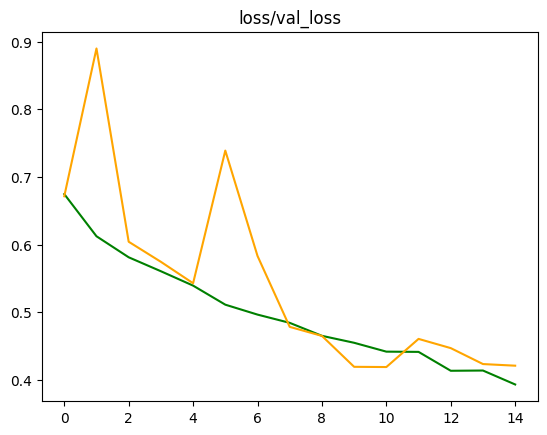

In [36]:
plt.title('loss/val_loss')
plt.plot(hist.history['loss'],color='green')
plt.plot(hist.history['val_loss'],color='orange')
plt.show()

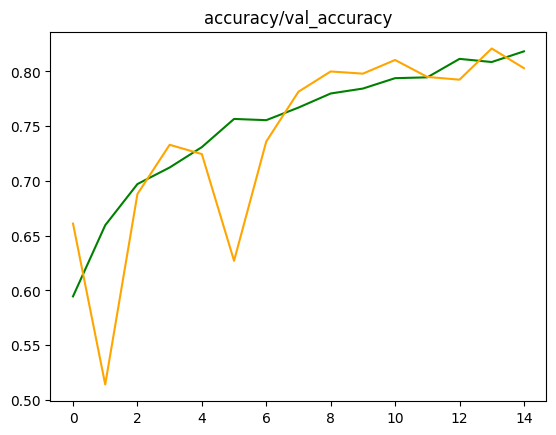

In [37]:
plt.title('accuracy/val_accuracy')
plt.plot(hist.history['accuracy'],color='green')
plt.plot(hist.history['val_accuracy'],color='orange')
plt.show()